In [183]:
import glob, os
import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [184]:
inc_intel = pd.read_csv('IncomeIntel.txt', sep=',', header=None)
inc_intel = inc_intel.rename(index=int, columns={0:'grad_year', 1:'gre_qnt', 2:'salary_p4'})

In [185]:
inc_intel.head()

,grad_year,gre_qnt,salary_p4
0,2001.0,739.737072,67400.475185
1,2001.0,721.811673,67600.584142
2,2001.0,736.277908,58704.880589
3,2001.0,770.498485,64707.290345
4,2001.0,735.002861,51737.324165


In [186]:
inc_intel.gre_qnt.head()

0    739.737072
1    721.811673
2    736.277908
3    770.498485
4    735.002861
Name: gre_qnt, dtype: float64

In [187]:
X = np.column_stack((inc_intel.grad_year, inc_intel.gre_qnt))
y_salary = inc_intel.salary_p4.values

# simple linear regression: age ~ tot_inc + wgt
regr_salary = linear_model.LinearRegression()
regr_salary.fit(X, y_salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [188]:
regr_salary.coef_

array([ 2.25763065e+03, -4.07632254e-01])

In [192]:
outcome  = 'salary_p4'
features = ['gre_qnt']

X, y = inc_intel[features], inc_intel[outcome] 

In [193]:
import statsmodels.api as sm

X_vars = X[['gre_qnt']]
X_vars = sm.add_constant(X_vars, prepend=False)
X_vars.head()

m = sm.OLS(y, X_vars)

res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        19:00:38   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt      -25.7632      1.365    -18.875      0.0

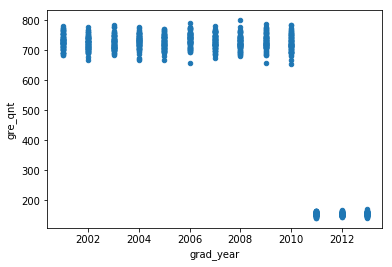

In [153]:
grad_year = inc_intel['grad_year']
gre_qnt = inc_intel['gre_qnt']
inc_intel.plot(x='grad_year', y='gre_qnt', kind='scatter')
plt.show()

In [154]:
# convert gre_qnt score
converted_gre_qnt = inc_intel.gre_qnt[:]   
for i in range(len(inc_intel)):
    if inc_intel.grad_year[i] <= 2010.0:
        converted_gre_qnt[i] = 130+ ((inc_intel.gre_qnt[i]-200)*40/600)
    else:
        pass
print(converted_gre_qnt)

0      165.982471
1      164.787445
2      165.751861
3      168.033232
4      165.666857
5      167.591736
6      165.917244
7      163.760498
8      163.725736
9      163.398132
10     163.983635
11     165.656972
12     166.892277
13     162.687473
14     168.276958
15     165.091815
16     163.515730
17     164.920436
18     167.203411
19     164.070872
20     163.531731
21     165.591856
22     165.727918
23     166.604608
24     165.505453
25     165.203363
26     162.684399
27     165.496589
28     164.983726
29     164.782603
          ...    
970    158.578197
971    147.667305
972    160.086274
973    156.289493
974    150.340044
975    163.054596
976    157.624151
977    150.927266
978    157.393763
979    154.449630
980    153.756644
981    150.796371
982    150.691700
983    153.639896
984    150.374470
985    162.350725
986    155.803279
987    159.111662
988    158.338350
989    162.308518
990    156.651125
991    153.836045
992    149.542467
993    155.349020
994    161

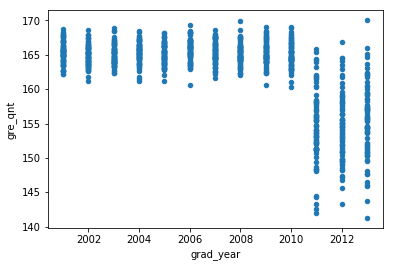

In [180]:
grad_year = inc_intel['grad_year']
gre_qnt = converted_gre_qnt
inc_intel.plot(x='grad_year', y='gre_qnt', kind='scatter')
plt.show()

1000

In [133]:
gre_qnt.head()

0    124.592906
1    124.589308
2    124.592211
3    124.599079
4    124.591955
Name: gre_qnt, dtype: float64

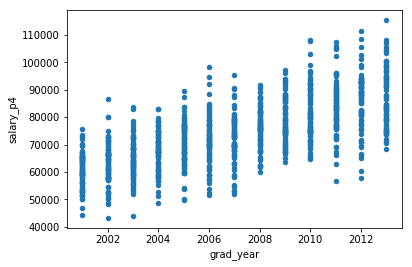

In [168]:
grad_year = inc_intel['grad_year']
salary_p4 = inc_intel['salary_p4']
inc_intel.plot(x='grad_year', y='salary_p4', kind='scatter')
plt.show()

In [169]:
grad_year = 2001.0

avg_inc_by_year = inc_intel['salary_p4'].groupby(inc_intel['grad_year']).mean().values

In [170]:
print(avg_inc_by_year)

[60710.70914543 63034.40316299 64518.74257413 67773.49308191
 70492.59210606 71678.24422176 72133.65421533 76432.58032125
 79030.62913159 81741.2973773  83563.85007019 86012.58607581
 87300.52109312]


In [171]:
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) / avg_inc_by_year[:-1]).mean()

In [172]:
print(avg_growth_rate)

0.030835347092883603


In [173]:
new_salary_p4 = salary_p4[:]

for i in range(len(salary_p4)):
    if inc_intel.grad_year[i] == 2001.0:
        new_salary_p4[i] = inc_intel.salary_p4[i]
    else:
        new_salary_p4[i] = inc_intel.salary_p4[i] / ((1 + avg_growth_rate)**(inc_intel.grad_year[i] - 2001.0))

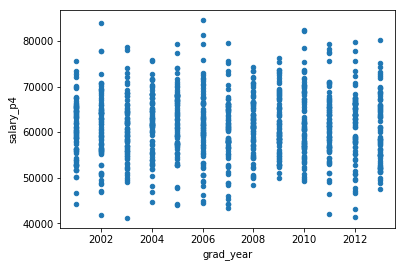

In [179]:
grad_year = inc_intel['grad_year']
salary_p4 = new_salary_p4
inc_intel.plot(x='grad_year', y='salary_p4', kind='scatter')
plt.show()

In [196]:
#ols_df['imputed_inc_by_age_educ'] = ols_df[['age', 'educ']].apply(get_income, axis=1) 
inc_intel['converted_gre_qnt'] = converted_gre_qnt

In [198]:
inc_intel.head()

,grad_year,gre_qnt,salary_p4,converted_gre_qnt
0,2001.0,739.737072,67400.475185,165.982471
1,2001.0,721.811673,67600.584142,164.787445
2,2001.0,736.277908,58704.880589,165.751861
3,2001.0,770.498485,64707.290345,168.033232
4,2001.0,735.002861,51737.324165,165.666857


In [199]:
inc_intel['new_salary_p4'] = new_salary_p4

In [200]:
inc_intel.head()

,grad_year,gre_qnt,salary_p4,converted_gre_qnt,new_salary_p4
0,2001.0,739.737072,67400.475185,165.982471,67400.475185
1,2001.0,721.811673,67600.584142,164.787445,67600.584142
2,2001.0,736.277908,58704.880589,165.751861,58704.880589
3,2001.0,770.498485,64707.290345,168.033232,64707.290345
4,2001.0,735.002861,51737.324165,165.666857,51737.324165


In [204]:
outcome  = 'new_salary_p4'
features = ['converted_gre_qnt']

X, y = inc_intel[features], inc_intel[outcome]

In [205]:
import statsmodels.api as sm

X_vars = X[['converted_gre_qnt']]
X_vars = sm.add_constant(X_vars, prepend=False)
X_vars.head()

m = sm.OLS(y, X_vars)

res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          new_salary_p4   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05257
Date:                Mon, 15 Oct 2018   Prob (F-statistic):              0.819
Time:                        23:02:19   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
converted_gre_qnt    -9.9681     43.47